In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
F = len('Agnieszka')
L = len('Welian')
N = (L+F) * 100

stan_data = {
    "N":N,
}

## Excercise 1 - generate data

In [3]:
model1 = CmdStanModel(stan_file='code_1.stan')
sample1 = model1.sample(stan_data, iter_sampling=1000, iter_warmup=1,  chains =1)

model2 = CmdStanModel(stan_file='code_2.stan')
sample2 = model2.sample(stan_data, iter_sampling=1000, iter_warmup=1, chains =1)


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:03 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:10 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


[ 0.478962  -2.32562   -0.191772  ...  1.28093    0.329345  -0.0742392]
[ 2.14077  -1.09748   0.47293  ... -0.395793 -1.63947  -2.50881 ]


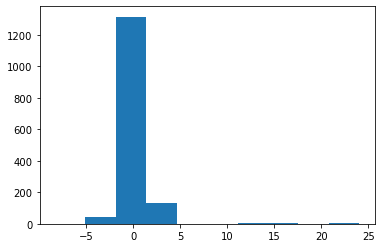

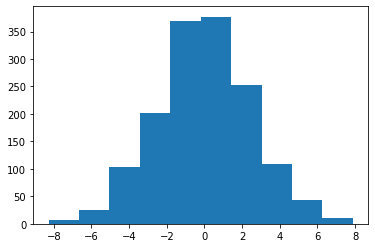

In [4]:
y1 = sample1.stan_variable('y')[0]
print(y1)
y2 = sample2.stan_variable('y')[0]
print(y2)

data1 = {
    'N': N,
    'y': y1
}

data2 = {
    'N': N,
    'y': y2
}

plt.hist(y1)
plt.show()
plt.hist(y2)
plt.show()


## Excercise 2 - compare normal and student models for data from first file

In [5]:
model3 = CmdStanModel(stan_file='code_3.stan')
fit3=model3.sample(data=data1, iter_sampling=1000, iter_warmup=1, chains =1)

fit3_2=model3.sample(data=data2, iter_sampling=1000, iter_warmup=1, chains =1)

model4 = CmdStanModel(stan_file='code_4.stan')
fit4=model4.sample(data=data1, iter_sampling=1000, iter_warmup=1, chains =1)

fit4_2=model4.sample(data=data2, iter_sampling=1000, iter_warmup=1, chains =1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:04 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:05 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:04 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:05 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


        rank         waic        p_waic      d_waic    weight          se  \
model3     0 -2921.045910  4.663424e-24    0.000000  0.871104  140.539762   
model4     1 -3102.943525  1.492225e-24  181.897615  0.128896   40.070592   

               dse  warning waic_scale  
model3    0.000000    False        log  
model4  133.589758    False        log  


c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


        rank        waic        p_waic    d_waic    weight         se  \
model3     0 -3767.22538  1.626015e-24   0.00000  0.481591  19.582038   
model4     1 -3803.88163  2.257630e-24  36.65625  0.518409  43.299332   

              dse  warning waic_scale  
model3   0.000000    False        log  
model4  38.062181    False        log  


c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


Text(0.5, 1.0, 'For data from model 2')

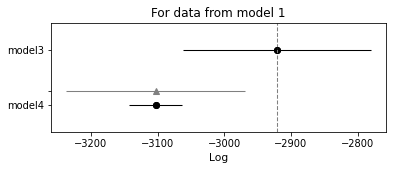

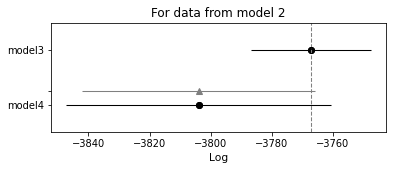

In [6]:
compare_dict_1 = {'model3': fit3,'model4': fit4}
compare_dict_2 = {'model3': fit3_2,'model4': fit4_2}

model_compare_waic_1 = az.compare(compare_dict_1, ic = 'waic')

print(model_compare_waic_1.head())
az.plot_compare(model_compare_waic_1)
plt.title('For data from model 1')

model_compare_waic_2 = az.compare(compare_dict_2, ic = 'waic')

print(model_compare_waic_2.head())
az.plot_compare(model_compare_waic_2)
plt.title('For data from model 2')


c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You 

        rank          loo  p_loo       d_loo    weight          se  \
model3     0 -2921.045910    0.0    0.000000  0.871104  140.539762   
model4     1 -3102.943525    0.0  181.897615  0.128896   40.070592   

               dse  warning loo_scale  
model3    0.000000     True       log  
model4  133.589758     True       log  


c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You 

        rank         loo  p_loo     d_loo    weight         se        dse  \
model3     0 -3767.22538    0.0   0.00000  0.481591  19.582038   0.000000   
model4     1 -3803.88163    0.0  36.65625  0.518409  43.299332  38.062181   

        warning loo_scale  
model3     True       log  
model4     True       log  


Text(0.5, 1.0, 'For data from model 2')

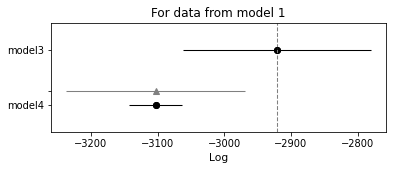

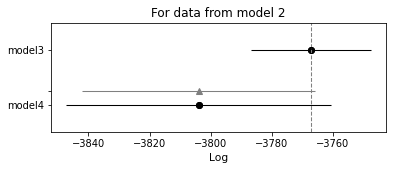

In [7]:
model_compare_loo_1 = az.compare(compare_dict_1, ic="loo", method="stacking", scale="log")

print(model_compare_loo_1.head())
az.plot_compare(model_compare_loo_1)
plt.title('For data from model 1')

model_compare_loo_2 = az.compare(compare_dict_2, ic = 'loo')

print(model_compare_loo_2.head())
az.plot_compare(model_compare_loo_2)
plt.title('For data from model 2')

## Excercise 3 - compare models with different numbers of predictors

In [8]:
x2 = sample2.stan_variable('X')

x2_1 = x2.reshape(1000,-1)[0:1,:N]
x2_1 = np.transpose(x2_1)

x2_2 = x2.reshape(1000,-1)[0:2,:N]
x2_2 = np.transpose(x2_2)

x2_3 = x2.reshape(1000,-1)[0:3,:N]
x2_3 = np.transpose(x2_3)


In [9]:
model5 = CmdStanModel(stan_file='code_5.stan')

fit5_1 = model5.sample(data={'N':N, 'K': 1, 'y':y2,'X':x2_1} ,
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=1, 
                            chains = 1)


fit5_2 = model5.sample(data={'N':N, 'K': 2, 'y':y2,'X':x2_2} ,
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=1, 
                            chains = 1)
                            

fit5_3 = model5.sample(data={'N':N, 'K': 3, 'y':y2,'X':x2_3} ,
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=1, 
                            chains = 1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:06 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:06 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:07 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You 

        rank           loo  p_loo         d_loo    weight          se  \
fit5_1     0  -3944.919760    0.0      0.000000  0.448824   11.091005   
fit5_2     1  -3944.919760    0.0      0.000000  0.448824   11.091005   
fit5_3     2 -22388.873015    0.0  18443.953255  0.102351  825.043423   

               dse  warning loo_scale  
fit5_1    0.000000     True       log  
fit5_2    0.000000     True       log  
fit5_3  818.362633     True       log  
        rank          waic        p_waic        d_waic    weight          se  \
fit5_1     0  -3944.919760  1.681114e-24      0.000000  0.448824   11.091005   
fit5_2     1  -3944.919760  1.681114e-24      0.000000  0.448824   11.091005   
fit5_3     2 -22388.873015  1.920870e-22  18443.953255  0.102351  825.043423   

               dse  warning waic_scale  
fit5_1    0.000000    False        log  
fit5_2    0.000000    False        log  
fit5_3  818.362633    False        log  


Text(0.5, 1.0, 'For data from model 5 - waic')

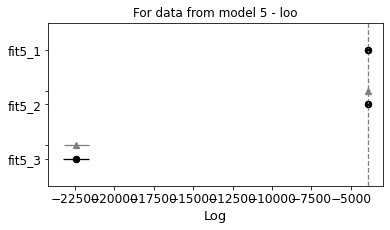

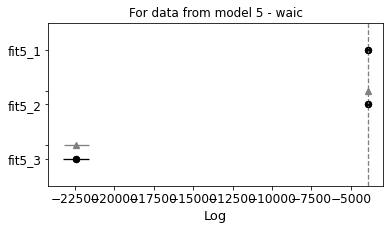

In [10]:
compare_dict_model5 = {'fit5_1': fit5_1, 'fit5_2': fit5_1, 'fit5_3': fit5_3}

model_compare_loo = az.compare(compare_dict_model5, ic="loo")
model_compare_waic = az.compare(compare_dict_model5, ic="waic")

print(model_compare_loo.head())
az.plot_compare(model_compare_loo)
plt.title('For data from model 5 - loo')

print(model_compare_waic.head())
az.plot_compare(model_compare_waic)
plt.title('For data from model 5 - waic')